# Result Visualizer

Different visualizations of anomaly detection result, including forecasts, reconstructions, anomaly scores, predicted and actual anomalies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import pickle
from sklearn.metrics import f1_score, precision_score, recall_score
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.graph_objs as go
import cufflinks as cf
import glob
import sys
import json
import more_itertools as mit
from tqdm.notebook import tqdm
import plotly.io as pio
pio.templates.default = "ggplot2"
pio.renderers.default = "notebook_connected"
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

cf.go_offline()
init_notebook_mode

import seaborn as sns
sns.set_theme(style="darkgrid")

sys.path.insert(0, '.')
from plotting import Plotter

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### Provide what output to visualize
In case of multiple models trained for the same dataset, they will be saved in different folders named using the datetime of training.
Use 'model_id' to specify which to load, '-1' for latest, '-2' for second latest, etc, or you can specify the exact datetime. 

In [3]:
# res_path = './output/MSL/org'
# res_path = './output/MSL/FGSM_org'
res_path = './output/MSL/PGD_org'

# res_path = './output/SMAP/best'
# res_path = './output/SMAP/FGSM'
# res_path = './output/SMAP/PGD'

# res_path = './output/SMD/1-1/org'
# res_path = './output/SMD/1-1/FGSM_org'
# res_path = './output/SMD/1-1/PGD_org'


#res_path = './output/SMAP'
#res_path = './output/SMD/1-1'

In [4]:
# plotter = Plotter(res_path, model_id="org")
# plotter = Plotter(res_path, model_id="FGSM_org")

# plotter = Plotter(res_path, model_id="best")
# plotter = Plotter(res_path, model_id="FGSM")
# plotter = Plotter(res_path, model_id="PGD")
# 
# plotter = Plotter(res_path, model_id="org")
# plotter = Plotter(res_path, model_id="FGSM_org")
plotter = Plotter(res_path, model_id="PGD_org")

plotter.result_summary()

Loading results of ./output/MSL/PGD_org
Result summary:
Epsilon:
		precision: 0.92, recall: 0.97, F1: 0.94
POT:
		precision: 0.97, recall: 0.86, F1: 0.91
Brute-Force:
		precision: 0.95, recall: 0.95, F1: 0.95


## Interactive plot 
- Interactive plot of forecastings, reconstructions,actual values, errors, etc of the specified feature.
- Params:
    - ```feature```: which feature to visualize
    - ```plot_train```: whether to also plot for train set
    - ```plot_errors```: whether to plot anomaly scores (error) for the feature
    - ```plot_feature_anom```: if True, the feature-wise threshold and anomaly prediction is included
    - ```start```: start index of dataset
    - ```end```: end index of dataset

If ```plot_feature_anom``` is set to True:
- Predicted anomalies (for the particular feature) are visualized by a light blue rectangle.
- As we only predict one feature for SMAP and MSL, the actual (true) anomalies are included using a red rectangle, making correctly predicted anomalies purple.


In [5]:
plotter.plot_feature(
    feature=0, 
    plot_train=False, 
    plot_errors=True, 
    plot_feature_anom=True,
    start=350, 
    end=3000
)

### Global (entity-level) Anomaly Predictions 
```plot_global_predictions``` and ```plotly_global_predictions``` visualize the entity-level anomaly scores which are used to make anomaly predictions at entity-level.
In ```plotly_global_predictions```:
- Actual (true) anomalies are visualized by a red rectangle
- Predicted anomalies are visualized by a blue rectangle. 
- Thus, if anomalies are predicted correctly the color of the rectangle will be purple. 

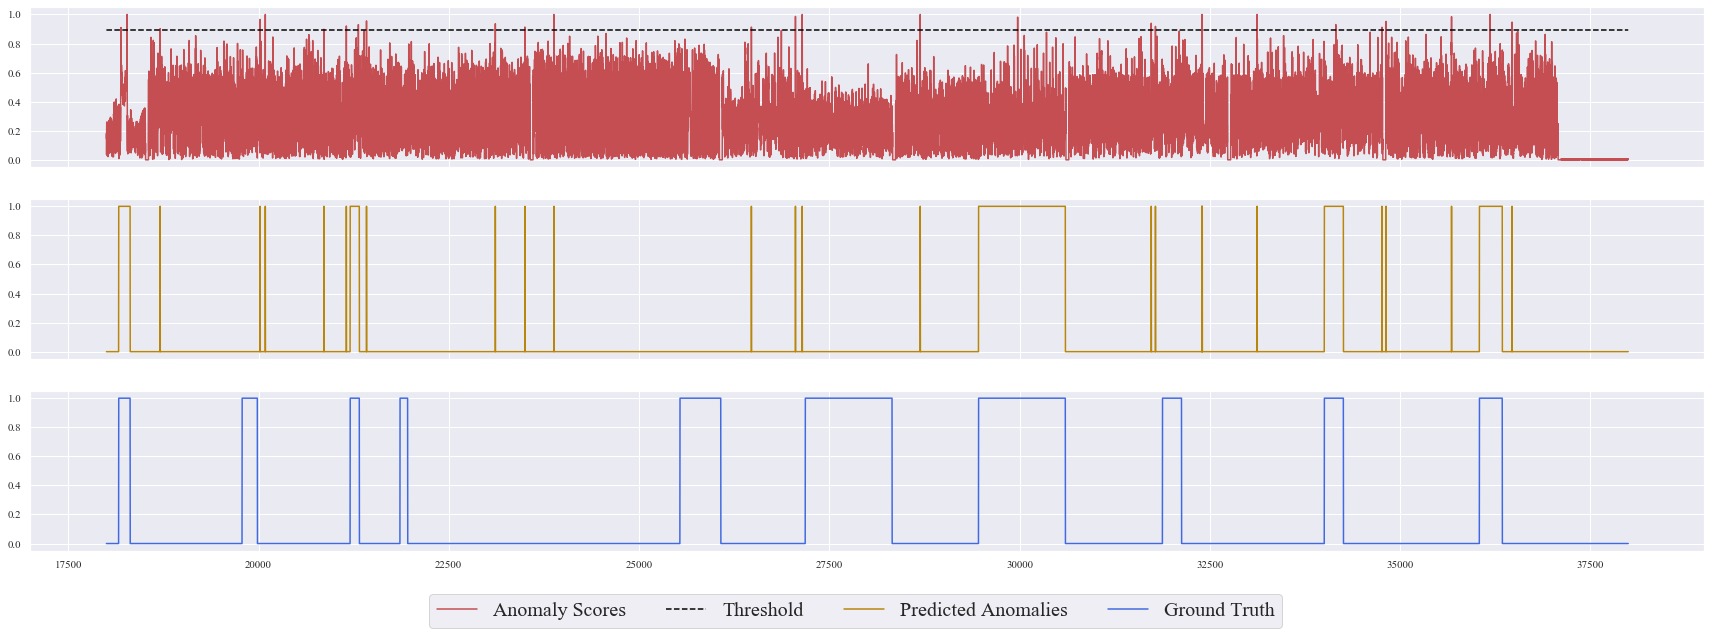

In [6]:
plotter.plot_global_predictions(type="test")

In [7]:
plotter.plotly_global_predictions(type="test")

<Figure size 432x288 with 0 Axes>

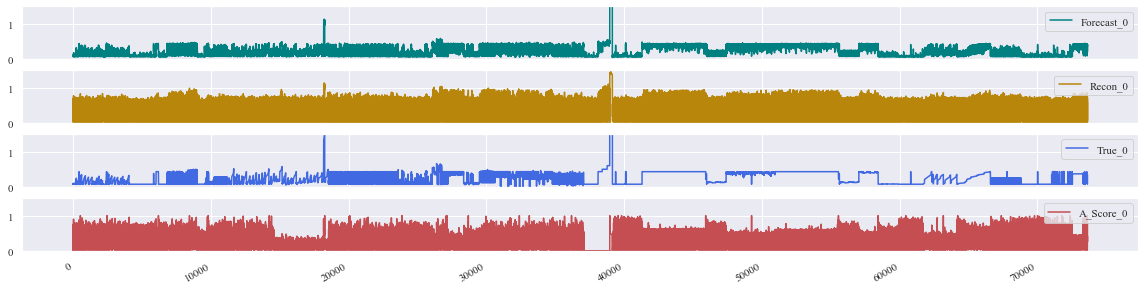

In [8]:
plotter.plot_all_features(type='test')